In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\sandi\Downloads\Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

y = le.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.2)

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [9]:
De = DecisionTreeClassifier(criterion='entropy')

In [10]:
De.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [11]:
ypred = De.predict(xtest)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

In [13]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [14]:
print(De.score(xtrain,ytrain))
De.score(xtest,ytest)

1.0


0.9666666666666667

[Text(0.4, 0.9166666666666666, 'X[2] <= 2.6\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[3] <= 1.55\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\nentropy =

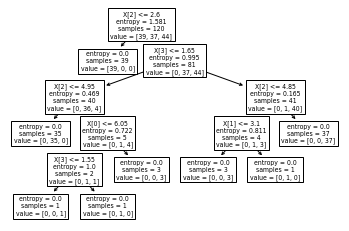

In [15]:
tree.plot_tree(De)

In [16]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 250

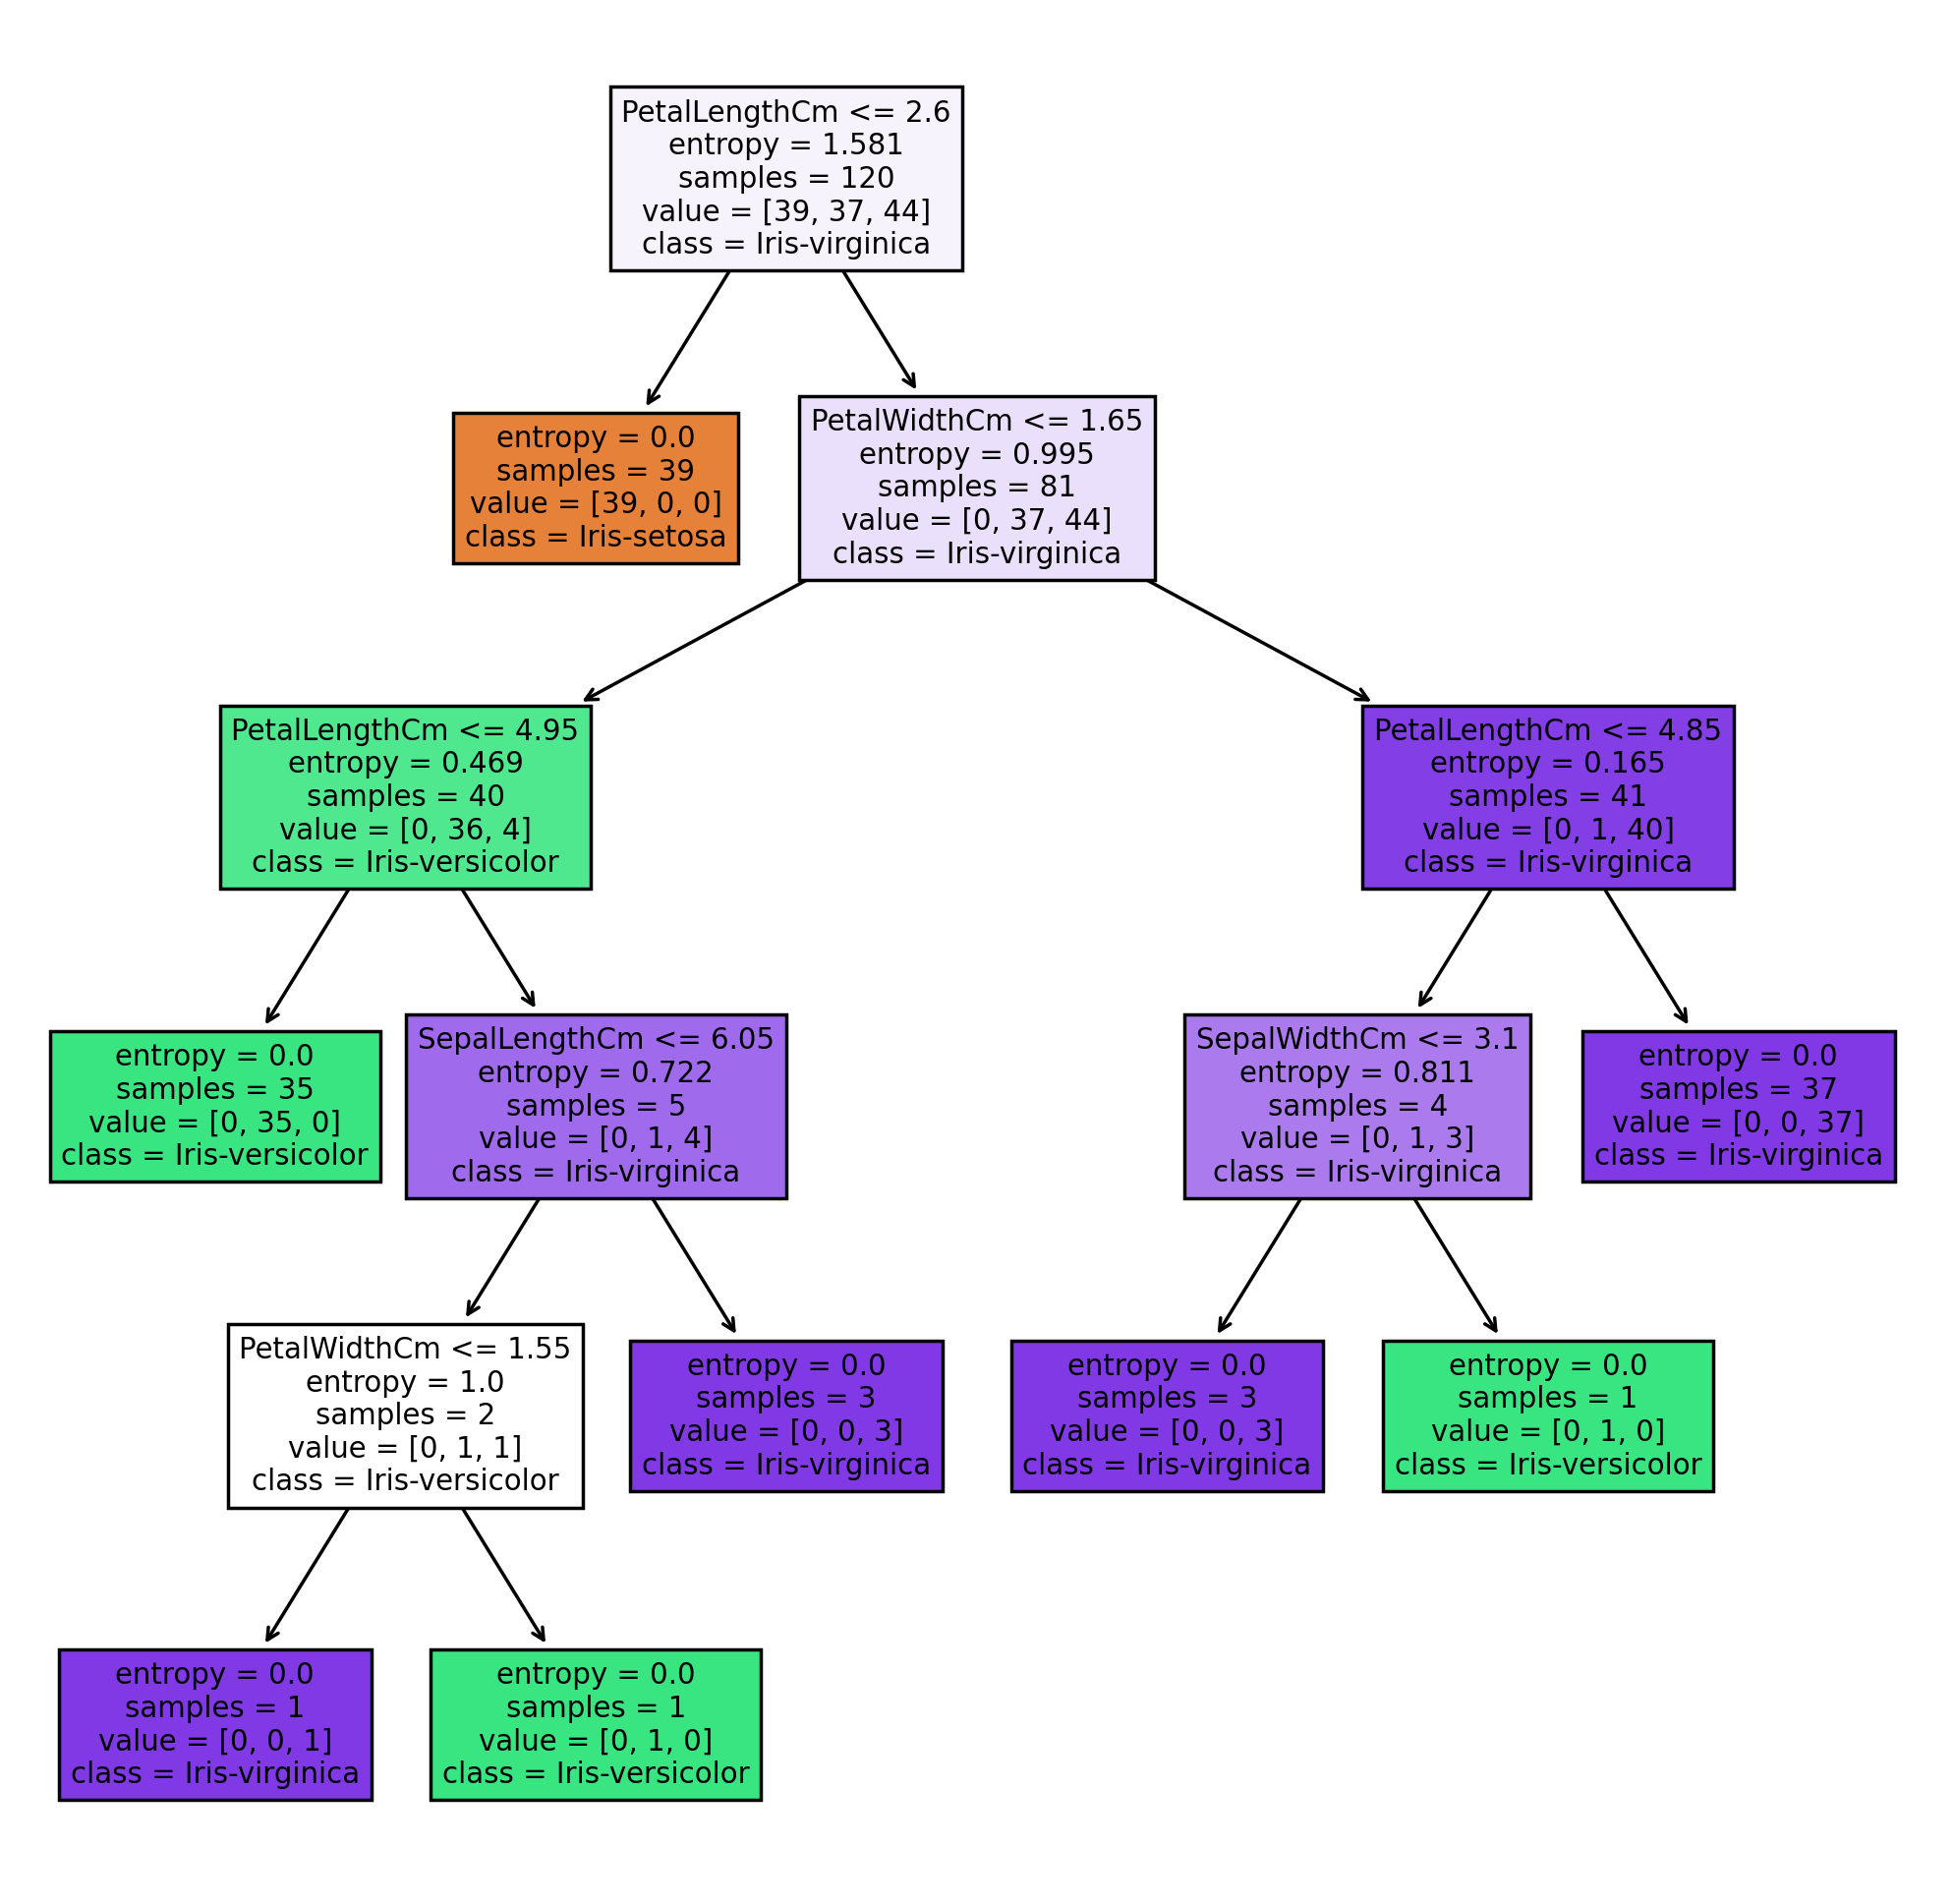

In [17]:
tree.plot_tree(De,feature_names=x.columns,filled=True,class_names=df['Species'].unique())
plt.show()

In [18]:
!pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(De,feature_names=x.columns,filled=True,class_names=df['Species'].unique())

viz